In [1]:
import numpy as np
import os
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline

In [2]:
from importlib import reload
import naive_keras
reload(naive_keras)
from naive_keras import Sequential, Conv2D, MaxPooling2D, ZeroPadding2D

In [3]:
model = Sequential(Conv2D(5, input_shape=(None, 20, 20, 3)),
                    MaxPooling2D(),
                    ZeroPadding2D(),
                    Conv2D(5))

In [4]:
x = np.random.randn(10,20,20,3)
y = model.predict(x)

In [5]:
model.layers[0].save_memory = True
model.layers[-1].save_memory = True
y2 = model.predict(x)

In [6]:
np.allclose(y, y2)

True

In [245]:
from importlib import reload
import naive_keras
reload(naive_keras)
from naive_keras import Sequential, Conv2D, MaxPooling2D, ZeroPadding2D

model = Sequential(ZeroPadding2D(input_shape=(None, 56, 56, 3)),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20))

''',
                   MaxPooling2D(),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   MaxPooling2D(),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20),
                   MaxPooling2D(),
                   ZeroPadding2D(),
                   Conv2D(20),
                   ZeroPadding2D(),
                   Conv2D(20))''';

In [246]:
model.summary()

,input_shape,output_shape
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 3)","(58, 58, 3)"
<class 'naive_keras.Conv2D'>,"(58, 58, 3)","(56, 56, 20)"
<class 'naive_keras.ZeroPadding2D'>,"(56, 56, 20)","(58, 58, 20)"
<class 'naive_keras.Conv2D'>,"(58, 58, 20)","(56, 56, 20)"


In [247]:
model.initialize_by_SVM('/home/spi/nbs/input/train/', batch_size=10)

Round 0 of 20: 100.0% of the weights used
Round 1 of 20: 95.9% of the weights used
Round 2 of 20: 72.0% of the weights used
Round 3 of 20: 34.3% of the weights used
Round 4 of 20: 34.1% of the weights used
Round 5 of 20: 21.2% of the weights used
Round 6 of 20: 18.2% of the weights used
Round 7 of 20: 14.4% of the weights used
Round 8 of 20: 16.6% of the weights used
Round 9 of 20: 8.3% of the weights used
Round 10 of 20: 8.4% of the weights used
Round 11 of 20: 7.4% of the weights used
Round 12 of 20: 6.5% of the weights used
Round 13 of 20: 5.9% of the weights used
Round 14 of 20: 5.5% of the weights used
Round 15 of 20: 3.9% of the weights used
Round 16 of 20: 2.6% of the weights used
Round 17 of 20: 2.2% of the weights used
Round 18 of 20: 2.2% of the weights used
Round 19 of 20: 1.6% of the weights used
Round 0 of 20: 100.0% of the weights used
Round 1 of 20: 52.5% of the weights used
Round 2 of 20: 68.0% of the weights used
Round 3 of 20: 54.4% of the weights used
Round 4 of 20: 

In [248]:
pics,labels = model.load_random_input(10, model.layers[0].input_shape[1:])

In [253]:
y = model.predict(pics)

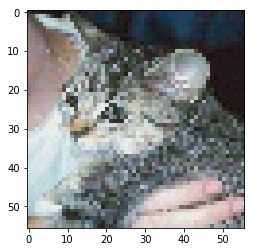

In [257]:
j = 2
plt.imshow(((pics[j]+2)*64).astype(np.uint8))

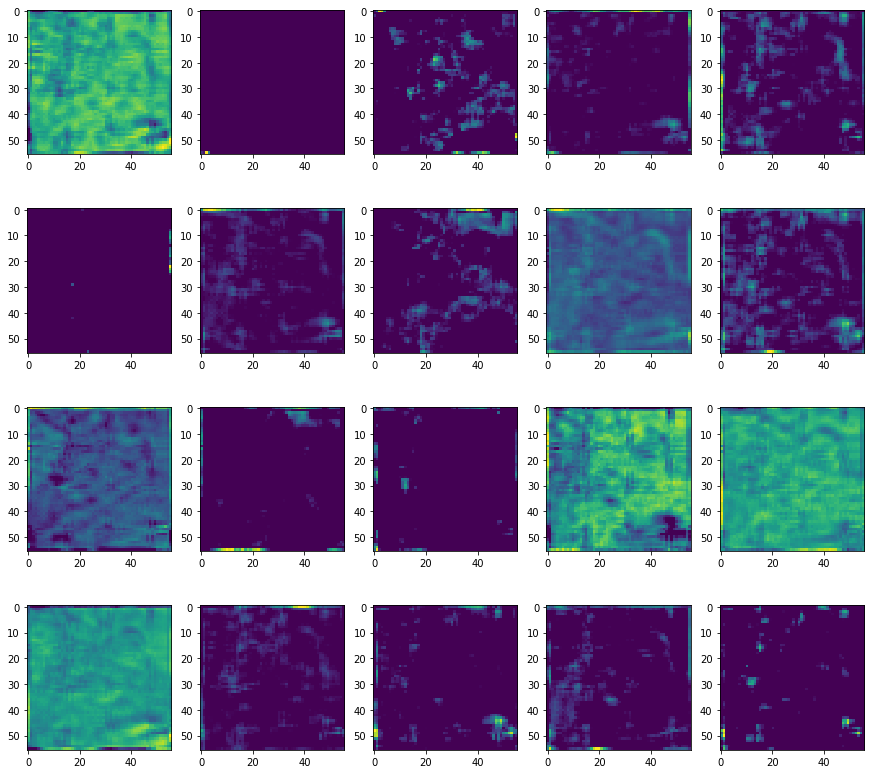

In [258]:
n = int(np.ceil(model.layers[-1].output_shape[-1] / 5))
f, axes = plt.subplots(n,5,figsize=(15,3*n+2))
for i in range(model.layers[-1].output_shape[-1]):
    axes[i//5,i%5].imshow(y[j,:,:,i])

In [266]:
labels[j]

1

In [268]:
for i in range(20):
    print('For {}-th filter, {:.0f}% are 0. For cats, {:.0f}%, for dogs {:.0f}%'.format(
        i, 100*(y[:,:,:,i]==0).mean(), 100*(y[labels==1,:,:,i]==0).mean(), 100*(y[labels==0,:,:,i]==0).mean()))

For 0-th filter, 8% are 0. For cats, 9%, for dogs 7%
For 1-th filter, 96% are 0. For cats, 97%, for dogs 94%
For 2-th filter, 82% are 0. For cats, 81%, for dogs 86%
For 3-th filter, 74% are 0. For cats, 78%, for dogs 63%
For 4-th filter, 45% are 0. For cats, 55%, for dogs 23%
For 5-th filter, 98% are 0. For cats, 98%, for dogs 99%
For 6-th filter, 40% are 0. For cats, 47%, for dogs 23%
For 7-th filter, 76% are 0. For cats, 75%, for dogs 80%
For 8-th filter, 1% are 0. For cats, 1%, for dogs 0%
For 9-th filter, 29% are 0. For cats, 36%, for dogs 12%
For 10-th filter, 13% are 0. For cats, 12%, for dogs 15%
For 11-th filter, 91% are 0. For cats, 90%, for dogs 94%
For 12-th filter, 76% are 0. For cats, 81%, for dogs 65%
For 13-th filter, 11% are 0. For cats, 10%, for dogs 15%
For 14-th filter, 1% are 0. For cats, 1%, for dogs 2%
For 15-th filter, 1% are 0. For cats, 1%, for dogs 1%
For 16-th filter, 52% are 0. For cats, 60%, for dogs 32%
For 17-th filter, 61% are 0. For cats, 68%, for dogs 